## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [52]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [53]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

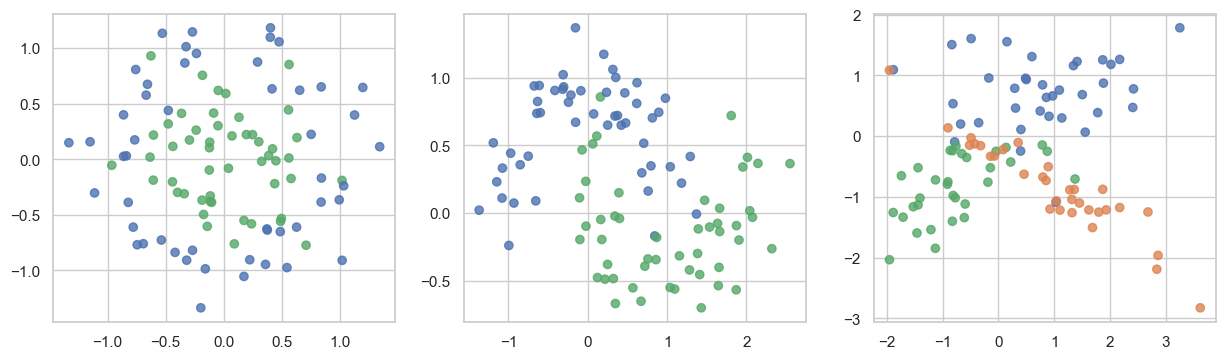

In [54]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [55]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

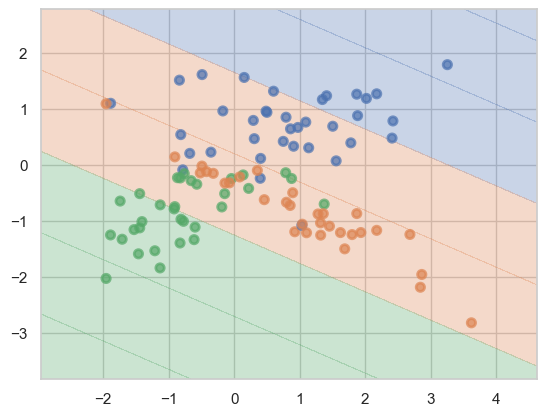

In [56]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Точность на обучающей выборке для 1 датасета 1.0
Точность на тестовой выборке для 1 датасета 0.7333333333333333
Точность на обучающей выборке для 2 датасета 1.0
Точность на тестовой выборке для 2 датасета 0.8666666666666667
Точность на обучающей выборке для 3 датасета 1.0
Точность на тестовой выборке для 3 датасета 0.8333333333333334


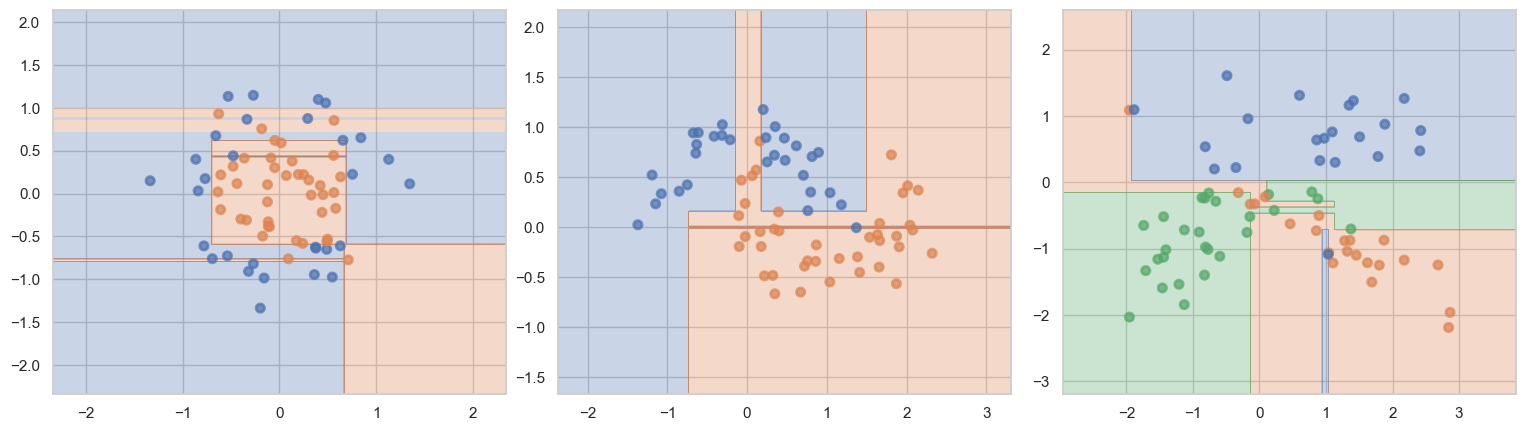

In [57]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(16, 5))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"Точность на обучающей выборке для {i + 1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"Точность на тестовой выборке для {i + 1} датасета", accuracy_score(y_test, pred_test))

__Ответ:__

Видно, что деревья переобучились. Точность разнится от 73 до 86 процентов 

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Max_Depth = 2

Точность на обучающей выборке для 1 датасета 0.8285714285714286
Точность на тестовой выборке для 1 датасета 0.6333333333333333
Точность на обучающей выборке для 2 датасета 0.9142857142857143
Точность на тестовой выборке для 2 датасета 0.9333333333333333
Точность на обучающей выборке для 3 датасета 0.9
Точность на тестовой выборке для 3 датасета 0.7666666666666667


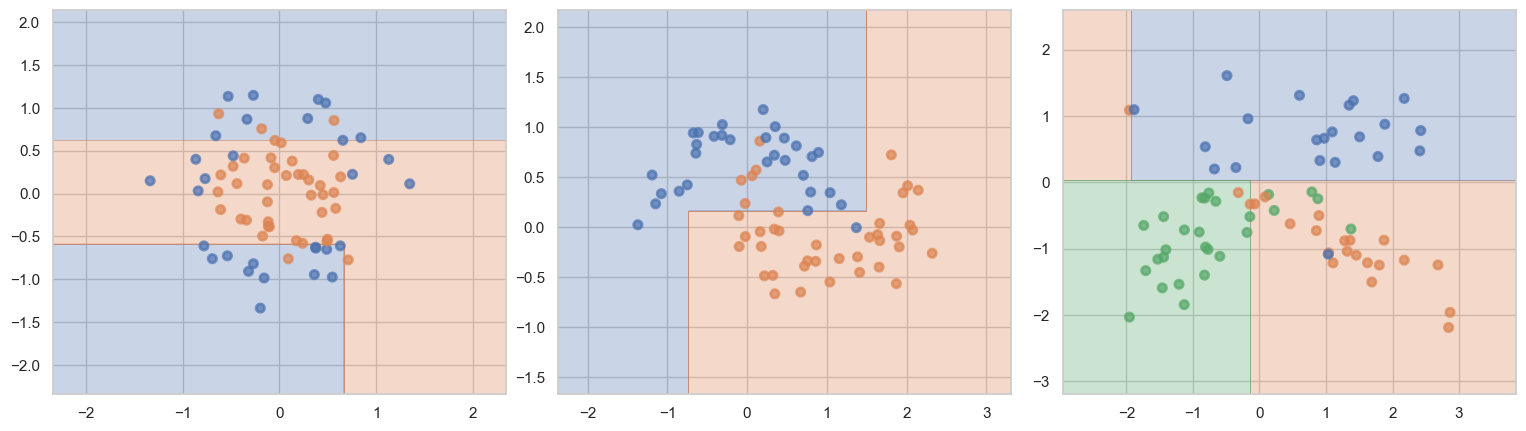

In [58]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(16, 5))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(max_depth=2)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"Точность на обучающей выборке для {i + 1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"Точность на тестовой выборке для {i + 1} датасета", accuracy_score(y_test, pred_test))

max_depth = 7

Точность на обучающей выборке для 1 датасета 1.0
Точность на тестовой выборке для 1 датасета 0.7666666666666667
Точность на обучающей выборке для 2 датасета 1.0
Точность на тестовой выборке для 2 датасета 0.8666666666666667
Точность на обучающей выборке для 3 датасета 1.0
Точность на тестовой выборке для 3 датасета 0.8333333333333334


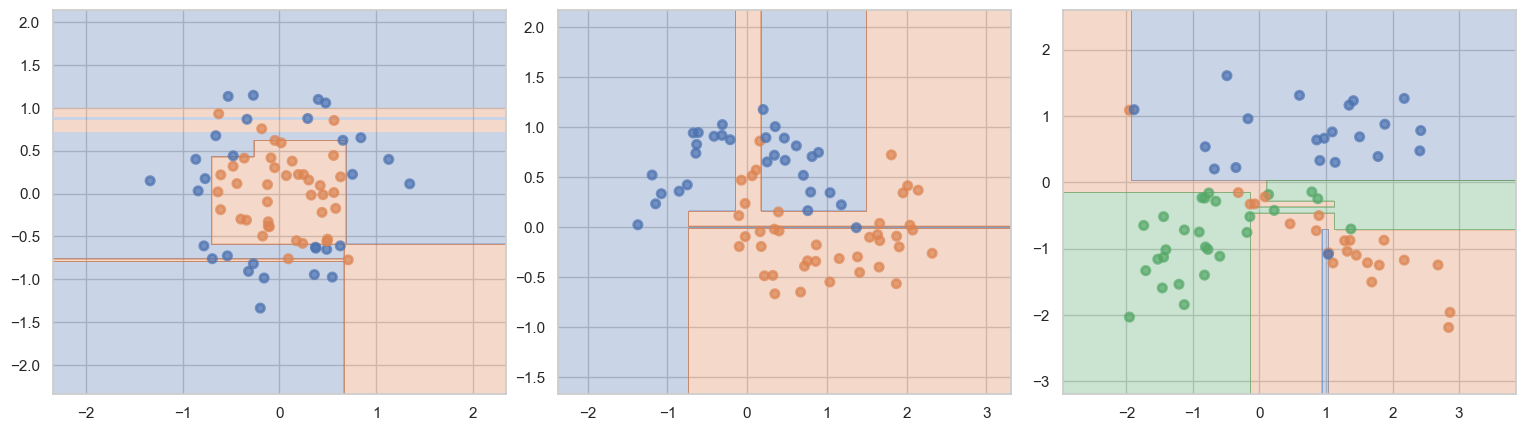

In [59]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(16, 5))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(max_depth=7)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"Точность на обучающей выборке для {i + 1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"Точность на тестовой выборке для {i + 1} датасета", accuracy_score(y_test, pred_test))

max_depth = 9

Точность на обучающей выборке для 1 датасета 1.0
Точность на тестовой выборке для 1 датасета 0.7333333333333333
Точность на обучающей выборке для 2 датасета 1.0
Точность на тестовой выборке для 2 датасета 0.8666666666666667
Точность на обучающей выборке для 3 датасета 1.0
Точность на тестовой выборке для 3 датасета 0.8


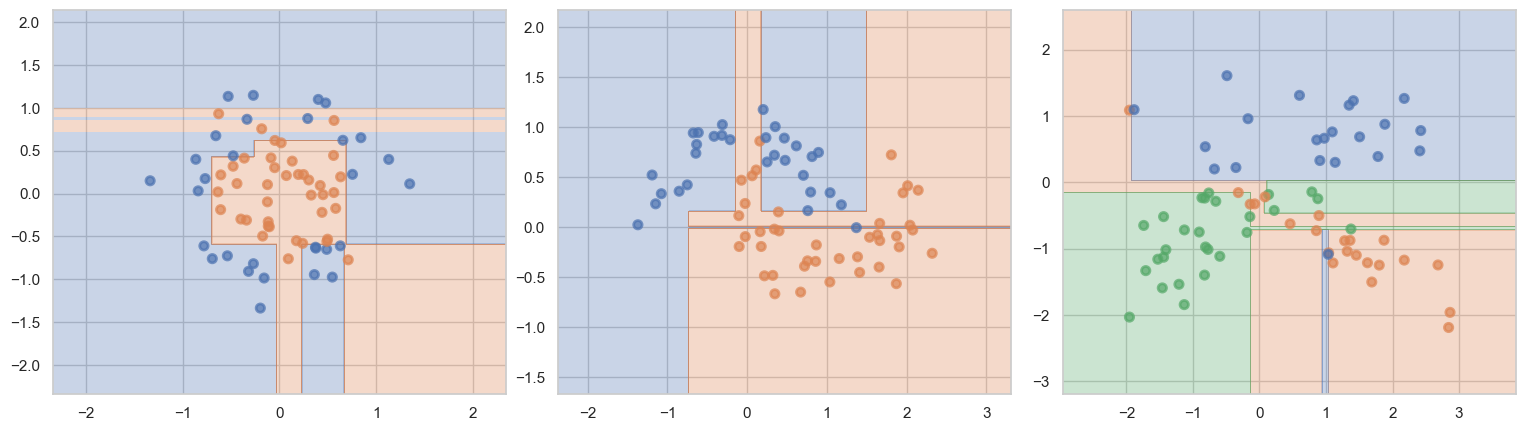

In [60]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(16, 5))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(max_depth=9)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"Точность на обучающей выборке для {i + 1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"Точность на тестовой выборке для {i + 1} датасета", accuracy_score(y_test, pred_test))

Min_sample_leaf = 2

Точность на обучающей выборке для 1 датасета 0.9428571428571428
Точность на тестовой выборке для 1 датасета 0.8333333333333334
Точность на обучающей выборке для 2 датасета 0.9857142857142858
Точность на тестовой выборке для 2 датасета 0.7666666666666667
Точность на обучающей выборке для 3 датасета 0.9142857142857143
Точность на тестовой выборке для 3 датасета 0.8333333333333334


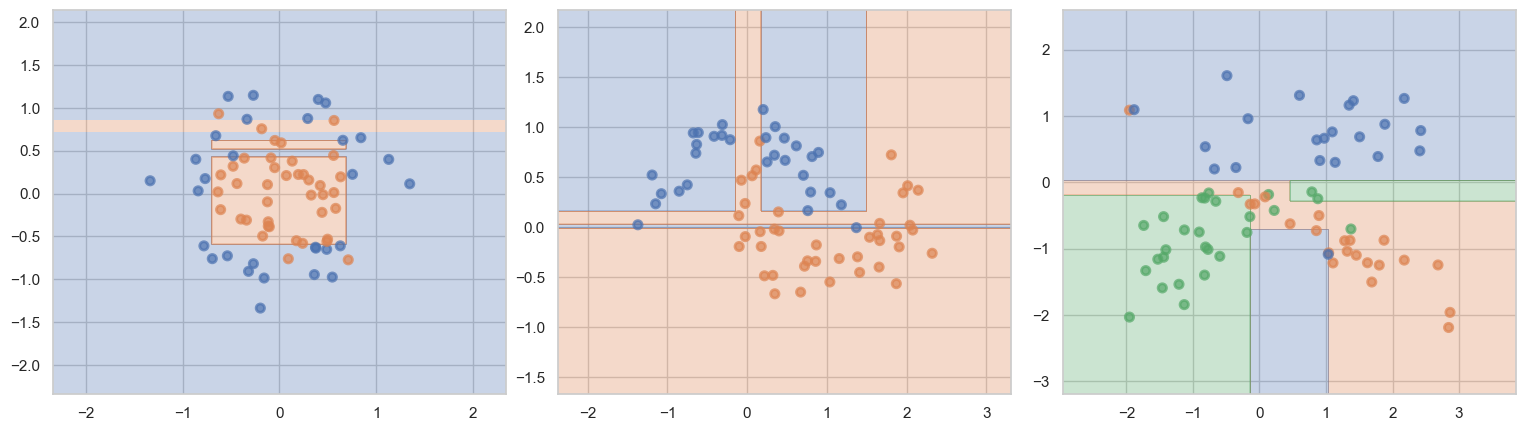

In [61]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(16, 5))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(min_samples_leaf=2)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"Точность на обучающей выборке для {i + 1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"Точность на тестовой выборке для {i + 1} датасета", accuracy_score(y_test, pred_test))

Min_sample_leaf = 7

Точность на обучающей выборке для 1 датасета 0.8285714285714286
Точность на тестовой выборке для 1 датасета 0.8
Точность на обучающей выборке для 2 датасета 0.9
Точность на тестовой выборке для 2 датасета 0.7
Точность на обучающей выборке для 3 датасета 0.8857142857142857
Точность на тестовой выборке для 3 датасета 0.7666666666666667


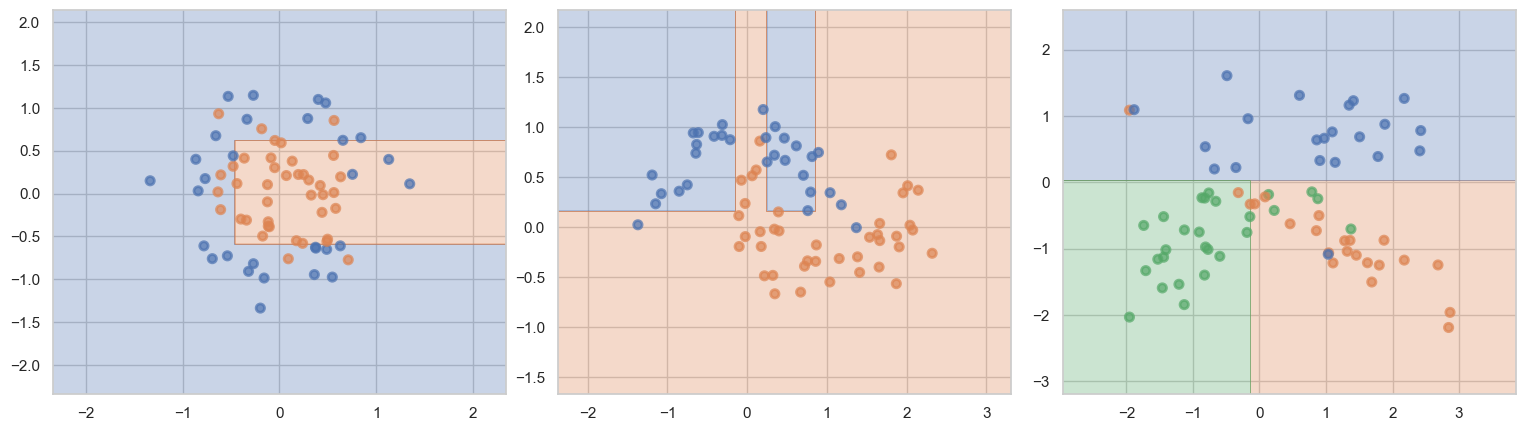

In [62]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(16, 5))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(min_samples_leaf=7)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"Точность на обучающей выборке для {i + 1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"Точность на тестовой выборке для {i + 1} датасета", accuracy_score(y_test, pred_test))

Min_sample_leaf = 10

Точность на обучающей выборке для 1 датасета 0.8285714285714286
Точность на тестовой выборке для 1 датасета 0.8
Точность на обучающей выборке для 2 датасета 0.8714285714285714
Точность на тестовой выборке для 2 датасета 0.7666666666666667
Точность на обучающей выборке для 3 датасета 0.8857142857142857
Точность на тестовой выборке для 3 датасета 0.7666666666666667


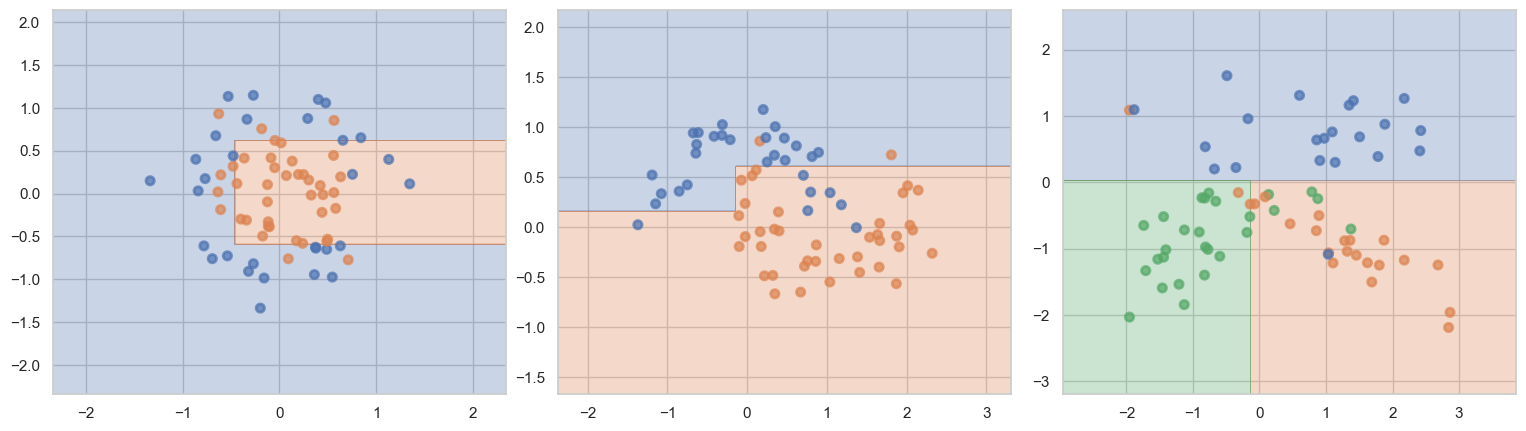

In [63]:
from sklearn.metrics import accuracy_score

plt.figure(figsize=(16, 5))

for i, (x, y) in enumerate(datasets):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tree = DecisionTreeClassifier(min_samples_leaf=9)
    tree.fit(x_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, x_train, y_train)
    pred_train = tree.predict(x_train)
    print(f"Точность на обучающей выборке для {i + 1} датасета", accuracy_score(y_train, pred_train))
    pred_test = tree.predict(x_test)
    print(f"Точность на тестовой выборке для {i + 1} датасета", accuracy_score(y_test, pred_test))

__Ответ:__

Обобщаю способность уменьшается при увелечении глубины разбиения, а при увелечении объектов в листе увеличивается

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [64]:
import pandas as pd
students_first = pd.read_excel('students.xls', sheet_name='Training_Data')
students_first
xls = pd.ExcelFile('data/students.xls')



FileNotFoundError: [Errno 2] No such file or directory: 'data/students.xls'

In [ ]:
students_second = pd.read_excel('students.xls', sheet_name='Test_Data')
students_second

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,0
2,0.08,0.18,0.63,0.60,0.85,1
3,0.20,0.20,0.68,0.67,0.85,1
4,0.22,0.22,0.90,0.30,0.90,1
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,1
141,0.85,0.82,0.66,0.83,0.83,1
142,0.56,0.60,0.77,0.13,0.32,0
143,0.66,0.68,0.81,0.57,0.57,1


In [ ]:
last_column = students_first.columns[-1]

y_train = np.array(students_first[last_column])
x_train = students_first.drop(columns=last_column)

y_test = np.array(students_second[last_column])
x_test = students_second.drop(columns=last_column)

x_train.head()



,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [ ]:
colors = ["red", "blue", "black", "yellow", "green"]
for i, column in enumerate(x_train.columns):
    feature = np.array(x_train[column])
    thresholds, gini, threshold_best, gini_best = hw5code.find_best_split(feature, y_train)
    plt.plot(thresholds, gini, c=colors[i], label=column)
plt.legend()
plt.xlabel("Порог")
plt.ylabel("Значение критерия Джини")


TypeError: cannot unpack non-iterable NoneType object

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**